# **MÉTODO SEBASTIAN**

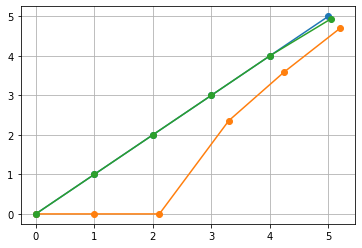

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def g(zi, z):
    gz = zi.real + np.sqrt((z-zi.real)**2 + zi.imag**2)
    return gz


def lin(x):
    return x
    
def curve_points(fun):
    x = np.linspace(0,5,6)
    y = fun(x)
    z = x + y*1j
    return z

w0 = curve_points(lin)
t = np.zeros(len(w0))
w = curve_points(lin)

for jj in range(1, 3):
    wi = w[jj]
    t[jj]=t[jj-1]+(1/4)*(wi.imag)**2
    for i in range(len(w)-jj):
        w[i+jj] = g(wi, w[i+jj])
        


plt.plot(w0.real, w0.imag, '-o')
plt.plot(w.real, w.imag, '-o')
plt.grid()


################################################## Inversa ###
def f(w1, ud, dt):
    fz = ud + np.sqrt((w1-ud)**2 - 4*dt)
    return fz
#print(w)
tt = t
u = np.array(w)
zz = np.array(u)


for ii in range(len(zz)-2):
    for kk in range(2):
        dtt = t[2-kk]-t[2-kk-1]
        zz[ii+2-kk] = f(zz[ii+2-kk], u[2-kk], dtt)
        
plt.plot(zz.real, zz.imag, '-o' )



# **MÉTODO JUANES**

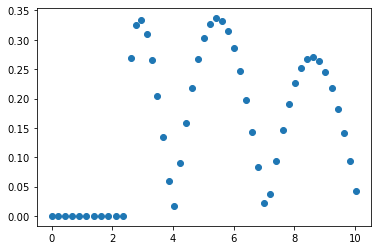

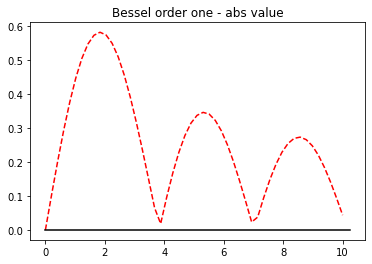

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.special import j1

def animate_vid(it_steps, filename, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
#     ax.set_xlim(0, 1.30)
    ims = []
    for i in range(len(w)):
        im, = ax.plot(w[i].real, w[i].imag, "k-")
        if i == 0:
            ax.plot(w[i].real, w[i].imag, "r--")
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval = 1, blit = True, repeat_delay = 0)
    ani.save(filename)


#Transformation function
g = lambda z_i, chi_i, dt_i: chi_i + np.sqrt((z_i-chi)**2 + 4*dt_i)

#Number of complex numbers in the curve
N = 50

#Function of the imaginary part
f = lambda X: j1(x)
#real and imaginary parts
x = np.linspace(0, 10, N)
y = f(x)
for i in range(N):
    if y[i]<0:
        y[i] = np.abs(y[i])
    

#Inital form of the curve
z0 = np.zeros(N, dtype = np.complex_)
z0 = x+y*1.j
chi = np.zeros(N-1)
t = np.zeros(N)

#Array that is going to save every iteration of the transformation.
w = np.zeros([len(t), N], dtype = np.complex_)
w[0,:] = z0

#Iteration
for i in range(1,len(t)):
    chi = w[i-1,i].real
    dt = (w[i-1,i].imag**2)/4
    w[i,i] = chi
    for j in range(1,len(z0)):
        if i-j >= 0:
            w[i,i-j] = w[i-1,i-j]
        if i+j <len(z0):
            w[i, i+j] = g(w[i-1,i+j], chi, dt)

i = 10
plt.scatter(w[i].real, w[i].imag)
plt.show()


animate_vid(w, "SLE_evolution_5.gif", "Bessel order one - abs value")